**https://github.com/avitomar12/TSP-using-Genetic-Algorithm/blob/master/tsp_GA.ipynb**

In [765]:
import numpy as np, random, operator, pandas as pd
import matplotlib.pyplot as plt

import timeit
import random
import pandas as pd
from random import sample
import math
import matplotlib.pyplot as plt
import numpy as np
import copy


In [766]:
number_of_nodes = 100 #len(cityCoordinates) 
''' following function generates coordinates (x,y) of 'n' customer nodes in a [n,2] array '''

def generateCoordinates():
    #data = pd.read_csv('MVRP_400N.txt', ' ')
    data = pd.read_csv('RC201.csv', ',')
    df = pd.DataFrame(data)
    coordinates = np.empty([number_of_nodes, 2])
    for i in range(number_of_nodes):
        for j in range(2):
            coordinates[i, 0] = df["X"][i]
            coordinates[i, 1] = df["Y"][i]
    return coordinates


coordinates = generateCoordinates()


''' this class passes coordinates of customer grid and do distance calculations between nodes '''

class distances:

    def __init__(self, coordinates):
        self.grid = coordinates
        self.distance_grid = np.empty((len(self.grid), len(self.grid)))

    ''' following function is to create 'n' by 'n' array storing distance from one node to other in respective cells'''

    def distance_matrix(self):
        for i in range(len(self.grid)):
            for j in range(len(self.grid)):
                self.distance_grid[i, j] = math.sqrt(
                    ((self.grid[i][0] - self.grid[j][0]) ** 2 + (self.grid[i][1] - self.grid[j][1]) ** 2))
        return self.distance_grid

    def get_distance_matrix(self):
        return self.distance_matrix()

    def distance(self, node1, node2):
        return self.distance_grid[node1, node2]

    ''' calculating total distance in a tour'''

    def tour_cost(self, tour=[]):
        total_distance = 0
        for i in range(len(tour) - 1):
            total_distance += self.distance_grid[tour[i], tour[i + 1]]
        total_distance += self.distance_grid[tour[len(tour) - 1], tour[0]]
        return total_distance

    ''' passes list of nodes in a tour and returns respective coordinates of customer nodes'''

    def generate_coordinates(self, tour=[]):
        tour_coordinates = np.empty([len(tour), 2])
        for i in range(len(tour)):
            for j in range(2):
                tour_coordinates[i, j] = self.grid[tour[i], j]
        return tour_coordinates.astype('int')

In [767]:
''' nearest neighbor as a greedy heuristic to create initial good solution'''

class nearestNeighborSearch:

    def __init__(self, coordinates):
        self.coordinates = coordinates
        self.solution = []

    def NNS(self):
        self.N = len(self.coordinates)
        free_nodes = []
        dist = distances(self.coordinates)
        dist.get_distance_matrix()
        for i in range(self.N - 1):
            free_nodes.append(i + 1)
        current_node = 0
        self.solution = [current_node]
        while free_nodes:
            next_node = min(
                free_nodes, key=lambda x: dist.distance(current_node, x))
            free_nodes.remove(next_node)
            self.solution.append(next_node)
            current_node = next_node
        return self.solution

In [768]:
nns = nearestNeighborSearch(coordinates)
y = nns.NNS()
for i in range(len(y)):
  y[i] = y[i] + 1
b = copy.deepcopy(y)
b

[1,
 91,
 66,
 67,
 84,
 65,
 57,
 96,
 93,
 92,
 81,
 95,
 94,
 72,
 97,
 55,
 82,
 62,
 69,
 56,
 89,
 99,
 70,
 83,
 100,
 53,
 58,
 87,
 75,
 88,
 60,
 98,
 76,
 59,
 78,
 26,
 24,
 22,
 49,
 19,
 20,
 50,
 21,
 23,
 25,
 52,
 86,
 64,
 77,
 90,
 85,
 63,
 51,
 68,
 35,
 32,
 30,
 28,
 27,
 29,
 31,
 33,
 34,
 73,
 42,
 40,
 39,
 38,
 37,
 36,
 41,
 44,
 45,
 43,
 71,
 3,
 7,
 8,
 9,
 47,
 5,
 46,
 6,
 4,
 2,
 80,
 74,
 79,
 61,
 54,
 13,
 15,
 48,
 18,
 17,
 16,
 14,
 10,
 11,
 12]

      X   Y
0    40  50
1    25  85
2    22  75
3    22  85
4    20  80
..   ..  ..
96   55  54
97    4  18
98   26  52
99   26  35
100  31  67

[101 rows x 2 columns]
101


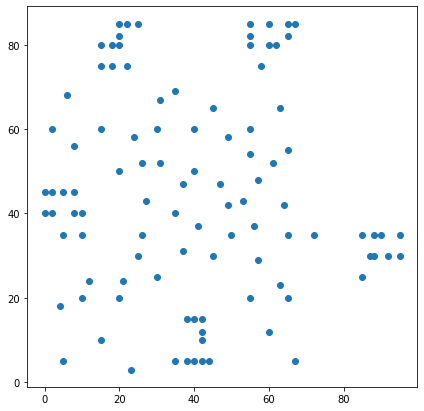

NumPy Array:
[[40 50]
 [25 85]
 [22 75]
 [22 85]
 [20 80]
 [20 85]
 [18 75]
 [15 75]
 [15 80]
 [10 35]
 [10 40]
 [ 8 40]
 [ 8 45]
 [ 5 35]
 [ 5 45]
 [ 2 40]
 [ 0 40]
 [ 0 45]
 [44  5]
 [42 10]
 [42 15]
 [40  5]
 [40 15]
 [38  5]
 [38 15]
 [35  5]
 [95 30]
 [95 35]
 [92 30]
 [90 35]
 [88 30]
 [88 35]
 [87 30]
 [85 25]
 [85 35]
 [67 85]
 [65 85]
 [65 82]
 [62 80]
 [60 80]
 [60 85]
 [58 75]
 [55 80]
 [55 85]
 [55 82]
 [20 82]
 [18 80]
 [ 2 45]
 [42  5]
 [42 12]
 [72 35]
 [55 20]
 [25 30]
 [20 50]
 [55 60]
 [30 60]
 [50 35]
 [30 25]
 [15 10]
 [10 20]
 [15 60]
 [45 65]
 [65 35]
 [65 20]
 [45 30]
 [35 40]
 [41 37]
 [64 42]
 [40 60]
 [31 52]
 [35 69]
 [65 55]
 [63 65]
 [ 2 60]
 [20 20]
 [ 5  5]
 [60 12]
 [23  3]
 [ 8 56]
 [ 6 68]
 [47 47]
 [49 58]
 [27 43]
 [37 31]
 [57 29]
 [63 23]
 [21 24]
 [12 24]
 [24 58]
 [67  5]
 [37 47]
 [49 42]
 [53 43]
 [61 52]
 [57 48]
 [56 37]
 [55 54]
 [ 4 18]
 [26 52]
 [26 35]
 [31 67]]
[[40, 50], [25, 85], [22, 75], [22, 85], [20, 80], [20, 85], [18, 75], [15, 7

In [769]:
import pandas as pd
import math
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

# Begin and end point is first city
df = pd.read_csv("RC201.csv")

#df = data
citySize = len(df)

print(df)
print(citySize)

x = np.array(df['X'])
y = np.array(df['Y'])
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)
plt.scatter(x, y)
plt.show()

# array to list
arr = np.array(df)
print(f'NumPy Array:\n{arr}')

coordinate = arr.tolist()

print(coordinate)

my_list = coordinate
my_dict = dict() 
for index,value in enumerate(my_list):
  my_dict[index] = value

cityList = my_dict

In [770]:
def create_starting_population(size,Number_of_city):
    '''Method create starting population 
    size= No. of the city
    Number_of_city= Total No. of the city
    '''
    population = []
    
    for i in range(0,size):
        population.append(nns.NNS())
        
    return population

In [771]:
def pick_mate(N):
    '''mates are randomaly picked 
    N= no. of city '''
    i=random.randint(0,N)    
    return i

In [772]:
def distance(i,j):
    '''
    Method calculate distance between two cities if coordinates are passed
    i=(x,y) coordinates of first city
    j=(x,y) coordinates of second city
    '''
    #returning distance of city i and j 
    return np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
    

In [773]:
def score_population(population, CityList):  
    '''
    Score of the whole population is calculated here
    population= 2 dimensional array conating all the routes
    Citylist= List of the city 
    '''
    scores = []
  
    for i in population:
        #print(i)
        scores.append(fitness(i, CityList))
        #print([fitness(i, the_map)])
    return scores

In [774]:
def fitness(route,CityList):
    '''Individual fitness of the routes is calculated here
    route= 1d array
    CityList = List of the cities
    '''
    #Calculate the fitness and return it.
    score=0
    #N_=len(route)
    for i in range(1,len(route)):
      k=int(route[i-1])
      l=int(route[i])
      
      score = score + distance(CityList[k],CityList[l])
        
        
    return score

In [775]:
def create_new_member(Number_of_city):
    '''
    creating new member of the population
    '''
    #pop=set(np.arange(Number_of_city,dtype=int))
    #pop=set(np.arange(nns.NNS(),dtype=int))
    pop = set(nns.NNS())
    #route=list(random.sample(pop,Number_of_city))
    route = list(pop)
            
    return route

In [776]:
def crossover(a,b):
    '''
    cross over 
    a=route1
    b=route2
    return child
    '''
    child=[]
    childA=[]
    childB=[]
    
    
    geneA=int(random.random()* len(a))
    geneB=int(random.random()* len(a))
    
    start_gene=min(geneA,geneB)
    end_gene=max(geneA,geneB)
    
    for i in range(start_gene,end_gene):
        childA.append(a[i])
        
    childB=[item for item in a if item not in childA]
    child=childA+childB
    
    return child


In [777]:
def mutate(route,probablity):
    '''
    mutation 
    route= 1d array
    probablity= mutation probablity
    '''
    #for mutating shuffling of the nodes is used
    route=np.array(route)
    for swaping_p in range(len(route)):
        if(random.random() < probablity):
            swapedWith = np.random.randint(0,len(route))
            
            temp1=route[swaping_p]
            
            temp2=route[swapedWith]
            route[swapedWith]=temp1
            route[swaping_p]=temp2
    
    return route

In [778]:
def selection(popRanked, eliteSize):
    selectionResults=[]
    result=[]
    for i in popRanked:
        result.append(i[0])
    for i in range(0,eliteSize):
        selectionResults.append(result[i])
    
    return selectionResults

In [779]:
def rankRoutes(population,City_List):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i],City_List)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

In [780]:
def breedPopulation(mating_pool):
    children=[]
    for i in range(len(mating_pool)-1):
            children.append(crossover(mating_pool[i],mating_pool[i+1]))
    return children

In [781]:
def mutatePopulation(children,mutation_rate):
    new_generation=[]
    for i in children:
        muated_child=mutate(i,mutation_rate)
        new_generation.append(muated_child)
    return new_generation

In [782]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [783]:
def next_generation(City_List,current_population,mutation_rate,elite_size):
    population_rank=rankRoutes(current_population,City_List)
    
    #print(f"population rank : {population_rank}")
    
    selection_result=selection(population_rank,elite_size)
    #print(f"selection results {selection_result}")
    
    mating_pool=matingPool(current_population,selection_result)
    #print(f"mating pool {mating_pool}")
    
    children=breedPopulation(mating_pool)
    #print(f"childern {children}")
    
    next_generation=mutatePopulation(children,mutation_rate)
    #print(f"next_generation {next_generation}")
    return next_generation

In [784]:
def genetic_algorithm(City_List,size_population=50,elite_size=25,mutation_Rate=0.0001,generation=1000):
    '''size_population = 1000(default) Size of population, 500, 25
        elite_size = 75 (default) No. of best route to choose, 25
        mutation_Rate = 0.05 (default) probablity of Mutation rate [0,1], 0.005 bagus
        generation = 2000 (default) No. of generation, 1000
        City_List,size_population=50,elite_size=25,mutation_Rate=0.0001,generation=1000 BAGUS
    '''

    # 100, 75, 0, 1000

    pop=[]
    pop_all=[]
    progress=[]
    rank_all=[]
    
    Number_of_cities=len(City_List)
    multiples_iterator = [n for n in range(1, generation+1) if n % 10 == 0]
    
    population=create_starting_population(size_population,Number_of_cities)
    progress.append(rankRoutes(population,City_List)[0][1])
    print(f"initial route distance {progress[0]}")
    print(f"initial route {population[0]}")
    for i in range(0,generation):
        pop = next_generation(City_List,population,mutation_Rate,elite_size)
        progress.append(rankRoutes(pop,City_List)[0][1])
        rank_=rankRoutes(pop,City_List)[0]
        
        for n in range(len(multiples_iterator)):
          if i == multiples_iterator[n]:
            #print(f"best Route distance for {i} generation {progress[i]}")
            rank_all.append(rank_[1])
            print(f"best Route distance for {i} generation {rank_[1]}")
            pop_all.append(pop[rank_[0]])
            print(f"Best Route for {i} generation :{pop[rank_[0]]} ")
    
    print(f"Best Route for {generation} generation :{pop[rank_[0]]} ")
    print(f"Best Route Distance for {generation} generation {rank_[1]}")
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    return rank_, pop, pop_all, rank_all
    
        

initial route distance 696.4237488546559
initial route [0, 90, 65, 66, 83, 64, 56, 95, 92, 91, 80, 94, 93, 71, 96, 54, 81, 61, 68, 55, 88, 98, 69, 82, 99, 52, 57, 86, 74, 87, 59, 97, 75, 58, 77, 25, 23, 21, 48, 18, 19, 49, 20, 22, 24, 51, 85, 63, 76, 89, 84, 62, 50, 67, 34, 31, 29, 27, 26, 28, 30, 32, 33, 72, 41, 39, 38, 37, 36, 35, 40, 43, 44, 42, 70, 2, 6, 7, 8, 46, 4, 45, 5, 3, 1, 79, 73, 78, 60, 53, 12, 14, 47, 17, 16, 15, 13, 9, 10, 11]
best Route distance for 10 generation 705.2588702523118
Best Route for 10 generation :[81  0 90 65 66 83 64 56 95 92 91 80 94 93 71 96 54 61 68 55 88 98 69 82
 99 52 57 86 74 87 59 97 75 58 77 25 23 21 48 18 19 49 20 22 24 51 85 63
 76 89 84 62 50 67 34 31 29 27 26 28 30 32 33 72 41 39 38 37 36 35 40 43
 44 42 70  2  6  7  8 46  4 45  5  3  1 79 73 78 60 53 12 14 47 17 16 15
 13  9 10 11] 
best Route distance for 20 generation 696.4237488546559
Best Route for 20 generation :[ 0 90 65 66 83 64 56 95 92 91 80 94 93 71 96 54 81 61 68 55 88 98 69 82
 9

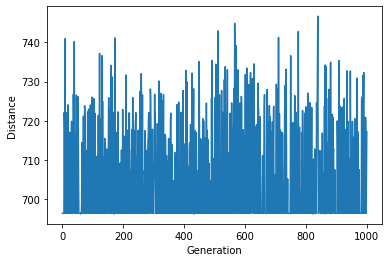


Time taken by GA is: 32.367830135000986
Best Route found : [ 0 90 65 66 83 64 56 95 92 91 80 94 93 71 96 54 81 61 68 55 88 98 69 82
 99 52 57 86 74 87 59 97 75 58 77 25 23 21 48 18 19 49 20 22 24 51 85 63
 76 89 84 62 50 67 34 31 29 27 26 28 30 32 33 72 41 39 38 37 36 35 40 43
 44 42 70  2  6  7  8 46  4 45  5  3  1 79 73 78 60 53 12 14 47 17 16 15
 13  9 10 11]
Best Route Distance is 696.4237488546559


In [785]:
start_ga = timeit.default_timer()
rank_,pop,pop_all,rank_all=genetic_algorithm(City_List=cityList)
end_ga = timeit.default_timer()
print('\nTime taken by GA is:', end_ga - start_ga)

search_progress = copy.deepcopy(rank_all)
idx = np.argsort(search_progress.sort())
best_route = pop_all[idx[0]]
best_distance = search_progress[idx[0]]
print("Best Route found :", pop_all[rank_all.index(best_distance)])
print("Best Route Distance is", best_distance)